In [2]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from scipy.optimize import curve_fit
import math
from scipy.special import jv

In [3]:
data = open('solar_obs_sept_6_lucy.rad')

In [4]:
freq_start = 1419.75
freq_inc = 0.00781250
freq_channels = np.arange(64)
frequency = freq_start + (freq_inc * freq_channels)
velocity = 3e8*(-(frequency/1420.0)+1)/1000
vel_diff = velocity[0]-velocity[1]

counter = 0

data = open('solar_obs_sept_6_lucy.rad')

list_info = []
for line in data:
    counter += 1
    line_list = line.strip().split()
    list_info.append(line_list[0])
indices = np.where(np.array(list_info) == '*')[0]
print(list_info)

indices2 = []
for i in range(len(indices)-1):
    if (indices[i+1]-indices[i]) == 2:
        indices2.append(int((indices[i+1]+indices[i])/2))
    elif (indices[i+1]-indices[i]) == 3:
        indices2.append(indices[i]+1)
        indices2.append(indices[i]+2)
        
for j in range(len(list_info)):
    if j < 15:
        indices2.append(j)
        
indices2 = list(indices2)
indices = list(indices)

index = indices + indices2
print(index)

values = []
for line in range(len(list_info)):
    if line not in index:
        values.append(line)
        
print(values)

groups_6 = [[15, 16, 17, 18, 19], [23, 24, 25, 26, 27], [31, 32, 33, 34, 35], [39, 40, 41, 42, 43], [47, 48, 49, 50], 
            [54, 55, 56, 57, 58], [62, 63, 64, 65], [69, 70, 71, 72, 73], [77, 78, 79, 80, 81], [85, 86, 87, 88],  
            [92, 93, 94, 95, 96], [100, 101, 102, 103, 104], [108, 109, 110, 111], [115, 116, 117, 118, 119], 
            [123, 124, 125, 126], [130, 131, 132, 133, 134], [138, 139, 140, 141], [145, 146, 147, 148, 149], 
            [153, 154, 155, 156, 160], [161, 162, 163, 164], [168, 169, 170, 171, 172], [176, 177, 178, 179, 180], 
            [184, 185, 186, 187, 188], [192, 193, 194, 195], [199, 200, 201, 202, 203], [207, 208, 209, 210, 211], 
            [215, 216, 217, 218]]

['*', '*', '2023:249:20:58:02', '*', '2023:249:20:58:05', '*', '2023:249:21:00:00', '*', '2023:249:21:00:03', '2023:249:21:00:05', '*', '2023:249:21:00:09', '*', '2023:249:21:02:35', '*', '2023:249:21:02:37', '2023:249:21:02:40', '2023:249:21:02:42', '2023:249:21:02:45', '2023:249:21:02:49', '*', '2023:249:21:03:12', '*', '2023:249:21:03:14', '2023:249:21:03:17', '2023:249:21:03:19', '2023:249:21:03:22', '2023:249:21:03:24', '*', '2023:249:21:03:30', '*', '2023:249:21:03:32', '2023:249:21:03:35', '2023:249:21:03:37', '2023:249:21:03:40', '2023:249:21:03:42', '*', '2023:249:21:03:50', '*', '2023:249:21:03:52', '2023:249:21:03:55', '2023:249:21:03:57', '2023:249:21:04:00', '2023:249:21:04:02', '*', '2023:249:21:04:07', '*', '2023:249:21:04:10', '2023:249:21:04:12', '2023:249:21:04:16', '2023:249:21:04:19', '*', '2023:249:21:04:24', '*', '2023:249:21:04:26', '2023:249:21:04:29', '2023:249:21:04:31', '2023:249:21:04:34', '2023:249:21:04:36', '*', '2023:249:21:04:41', '*', '2023:249:21:04:4

[77254.15933060827, 48680.512763846535, 48749.834946944786, 48832.922534972546, 48956.646126521235, 49071.489876520674, 49200.0577682454, 49146.126760323124, 49086.971830745955, 49778.732944298914, 52282.59242932188, 58046.46786943454, 67281.96522854433, 75357.933538364, 77789.47513166198, 72562.59903133541, 62480.7025745185, 54602.77288705701, 50466.7803694716, 49490.42693637778, 49042.60563356307, 48962.588027929654, 48882.04225328217, 48730.399977754736, 48664.667693424075, 48689.82174271972, 48648.40999095936]
[623.286680660296, 402.8266699372032, 388.3272387114829, 407.47678039264554, 388.3282597550597, 410.9683701781463, 376.2163211022296, 379.92507834565515, 399.757306309753, 361.63682082220015, 430.08785610012166, 488.8241294644056, 546.8810238512726, 605.8926702230116, 609.6090489136353, 587.1662248132429, 492.449724283462, 464.77631412681217, 504.1593246322785, 418.05709876675144, 406.4400979975681, 367.28869319589944, 363.61575979158306, 355.2758133079732, 399.9181623605681,

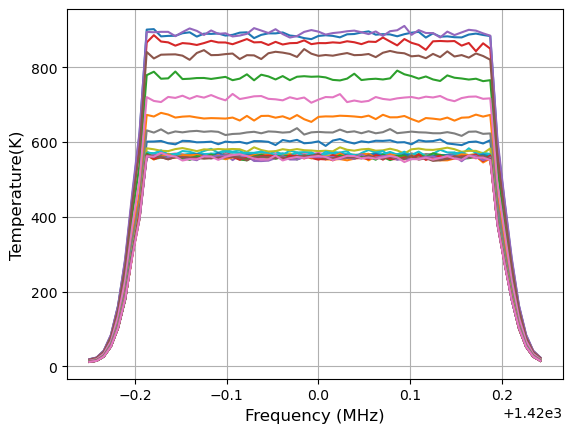

In [50]:
integrated_intensities = []
std_dev = []
for i in range(len(groups_6)):
    spectra = []
    for j in groups_6[i]:
        data = open('solar_obs_sept_6_lucy.rad')
        intensity = data.readlines()[j][:-1].split(' ')
        intensity = [x for x in intensity if x != '']
        intensity = [float(x) for x in intensity[-64:]]
        spectra.append(intensity)
    
    #print(spectra)
    s = np.mean(spectra, axis=0)
    standard_dev = np.sum(np.std(spectra, axis = 0))
    #print(np.sum(standard_dev))
    total = np.sum(s)*vel_diff
    integrated_intensities.append(total)
    std_dev.append(standard_dev)

    #plt.figure(figsize = [10,6])
    plt.plot(frequency,s)
    plt.ylabel('Temperature(K)', fontsize = 12)
    plt.xlabel('Frequency (MHz)', fontsize = 12)
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    plt.grid()
plt.savefig('Total_Intensity.png', bbox_inches='tight')

print(integrated_intensities)
print(std_dev)
print(vel_diff)

[-25 -23 -21 -19 -17 -15 -13 -11  -9  -7  -5  -3  -1   0   1   3   5   7
   9  11  13  15  17  19  21  23  25]
[-20.6524573623941, -19.00026077340257, -17.34806418441104, -15.695867595419514, -14.043671006427987, -12.391474417436458, -10.73927782844493, -9.087081239453402, -7.434884650461875, -5.782688061470347, -4.13049147247882, -2.4782948834872918, -0.8260982944957639, 0.0, 0.8260982944957639, 2.4782948834872918, 4.13049147247882, 5.782688061470347, 7.434884650461875, 9.087081239453402, 10.73927782844493, 12.391474417436458, 14.043671006427987, 15.695867595419514, 17.34806418441104, 19.00026077340257, 20.6524573623941]
[2.90059727e+04 5.39486543e-01 3.61620593e+00]
7.5729999999999995


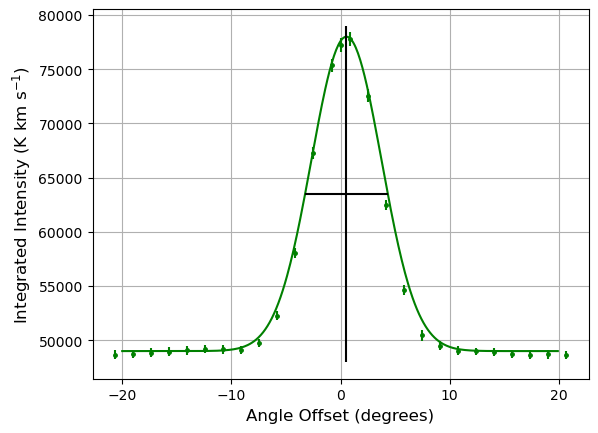

In [48]:
integrated_intensities = [48680.512763846535, 48749.834946944786, 48832.922534972546, 48956.646126521235, 49071.489876520674, 
                          49200.0577682454, 49146.126760323124, 49086.971830745955, 49778.732944298914, 52282.59242932188, 
                          58046.46786943454, 67281.96522854433, 75357.933538364, 77254.15933060827, 77789.47513166198, 
                          72562.59903133541, 62480.7025745185, 54602.77288705701, 50466.7803694716, 49490.42693637778, 
                          49042.60563356307, 48962.588027929654, 48882.04225328217, 48730.399977754736, 48664.667693424075, 
                          48689.82174271972, 48648.40999095936]

std_dev = [402.8266699372032, 388.3272387114829, 407.47678039264554, 388.3282597550597, 410.9683701781463, 376.2163211022296, 
           379.92507834565515, 399.757306309753, 361.63682082220015, 430.08785610012166, 488.8241294644056, 546.8810238512726, 
           605.8926702230116, 623.286680660296, 609.6090489136353, 587.1662248132429, 492.449724283462, 464.77631412681217, 
           504.1593246322785, 418.05709876675144, 406.4400979975681, 367.28869319589944, 363.61575979158306, 355.2758133079732, 
           399.9181623605681, 379.29496668889, 374.41291364787884]
#integrated_intensities = [x-7e5 for x in integrated_intensities]
angle_offset_1 = np.arange(-25, 0, 2)
angle_offset_2 = np.arange(1, 27, 2)
angle_offset = np.array(list(angle_offset_1) + [0] + list(angle_offset_2))
print(angle_offset)

new_angles = []
for q in range(len(angle_offset)):
    new = angle_offset[q]*math.cos(34.3*math.pi/180)
    new_angles.append(new)
print(new_angles)
    
x0 = np.arange(-20, 20, 0.1)
def gauss_function(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))+49000

popt, pcov = curve_fit(gauss_function, angle_offset, integrated_intensities, p0 = [30000, 0.5, 4])
print(popt)

#print(gauss_function(x0, *popt))
#plot the fit results
plt.plot(x0, gauss_function(x0, 2.90059727e+04, 5.39486543e-01, 3.21620593e+00), color = 'green')

#plt.figure(figsize = [10,6])
plt.errorbar(new_angles, integrated_intensities, yerr = std_dev, fmt="o", ms = 2.5, color = 'green')
plt.ylabel(r'Integrated Intensity (K km s$^{-1}$)', fontsize = 12)
plt.xlabel('Angle Offset (degrees)', fontsize = 12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid()

plt.vlines(5.39486543e-01, 48000, 79000, color = 'black')
plt.hlines(63502.98, -3.247, 4.326, color = 'black')

print(3.247 + 4.326)

plt.savefig('Offset.png', bbox_inches='tight')

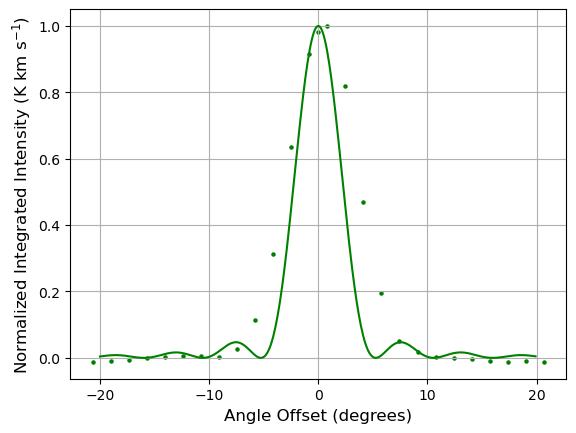

In [30]:
lowered_int = [(x-49000) for x in integrated_intensities]
normalized = [x/np.max(lowered_int) for x in lowered_int]

lambda_x = 0.211
D = 2.3

x0_1 = [np.sin(math.pi * D * np.sin(x*math.pi/180)/lambda_x)**2/(math.pi * D * np.sin(x*math.pi/180)/lambda_x)**2 for x in x0]
plt.plot(x0, x0_1, color = 'green')

plt.scatter(new_angles, normalized, color = 'green', s = 5)
plt.ylabel(r'Normalized Integrated Intensity (K km s$^{-1}$)', fontsize = 12)
plt.xlabel('Angle Offset (degrees)', fontsize = 12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid()

plt.savefig('Bessel.png', bbox_inches='tight')